In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Enables plots to display directly below the code cells
%matplotlib inline

In [3]:
class Student:
    def __init__(self, student_id, assignments, exams):
        self.student_id = student_id
        self.assignments = assignments
        self.exams = exams
        self.final_grade = None
        self.letter_grade = None

    def calculate_final_grade(self, assignment_weight = 0.4, exam_weight = 0.6):
        average_assignments = sum(self.assignments)/len(self.assignments)
        average_exams = sum(self.exams)/len(self.exams)
        self.final_grade = (assignment_weight * average_assignments) + (exam_weight * average_exams)

    def assign_letter_grade(self):
        if self.final_grade >= 90:
            self.letter_grade = "A"
        elif self.final_grade >= 80:
            self.letter_grade = "B"
        elif self.final_grade >= 70:
            self.letter_grade = "C"
        elif self.final_grade >= 60:
            self.letter_grade = "D"
        else:
            self.letter_grade = "F"

In [4]:
students = [
    Student("S001", [56, 45, 75], [94, 92]),
    Student("S002", [84, 63, 72], [88, 77]),
    Student("S003", [90, 85, 87], [91, 95]),
    Student("S004", [45, 52, 48], [50, 55]),
    Student("S005", [70, 74, 73], [80, 78]),
]
for student in students:
    student.calculate_final_grade()
    student.assign_letter_grade()

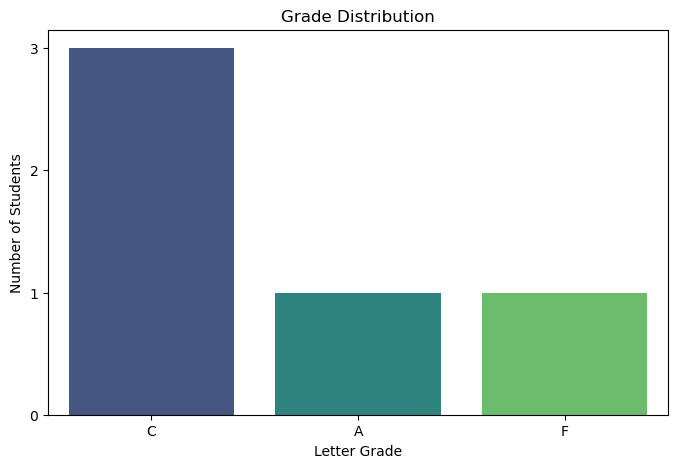

In [5]:
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import matplotlib.pyplot as plt

letter_grades = [student.letter_grade for student in students]

plt.figure(figsize = (8,5))
sns.countplot(x = letter_grades, hue = letter_grades, palette = "viridis", legend = False)
plt.title("Grade Distribution")
plt.xlabel("Letter Grade")
plt.ylabel("Number of Students")

#Set y-axis to show only integer values
plt.gca().yaxis.set_major_locator(MaxNLocator(integer = True))
plt.show()

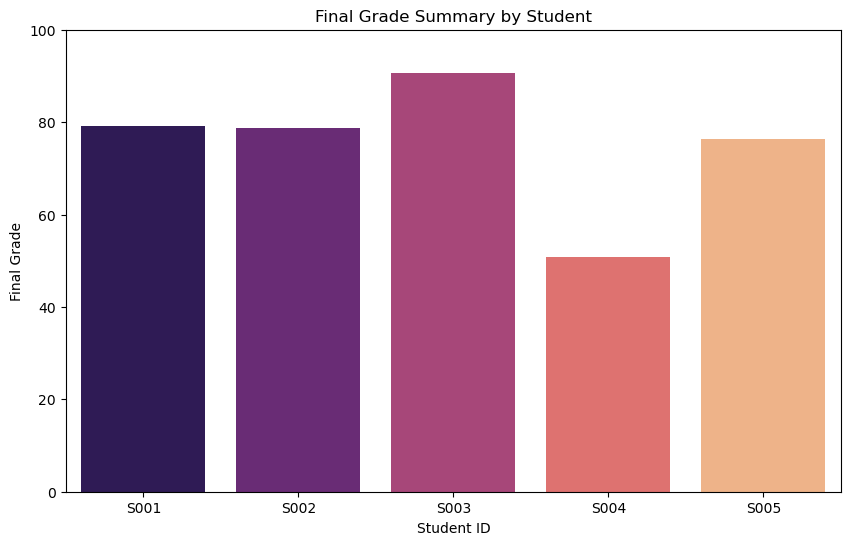

In [10]:
student_ids = [student.student_id for student in students]
final_grades = [student.final_grade for student in students]

plt.figure(figsize = (10,6))
sns.barplot(x = student_ids, y = final_grades, hue = student_ids, palette = "magma", legend = False)
plt.title("Final Grade Summary by Student")
plt.xlabel("Student ID")
plt.ylabel("Final Grade")
plt.ylim(0, 100)
plt.show()

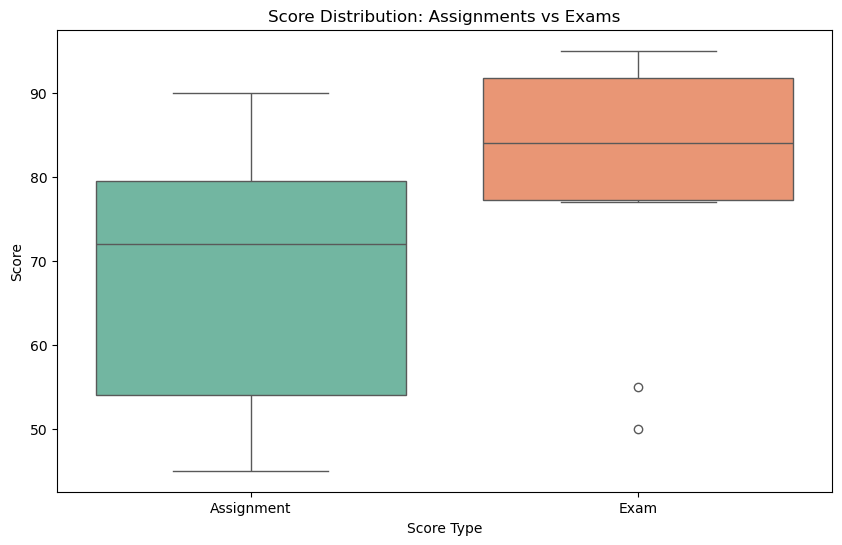

In [12]:
data = {
    "Student ID": [],
    "Score Type": [],
    "Score": []
}
for student in students:
    for score in student.assignments:
        data["Student ID"].append(student.student_id)
        data["Score Type"].append("Assignment")
        data["Score"].append(score)
    for score in student.exams:
        data["Student ID"].append(student.student_id)
        data["Score Type"].append("Exam")
        data["Score"].append(score)

df = pd.DataFrame(data)

plt.figure(figsize = (10,6))
sns.boxplot(x = "Score Type", y = "Score", hue = "Score Type", data = df, palette = "Set2", legend = False)
plt.title("Score Distribution: Assignments vs Exams")
plt.show()

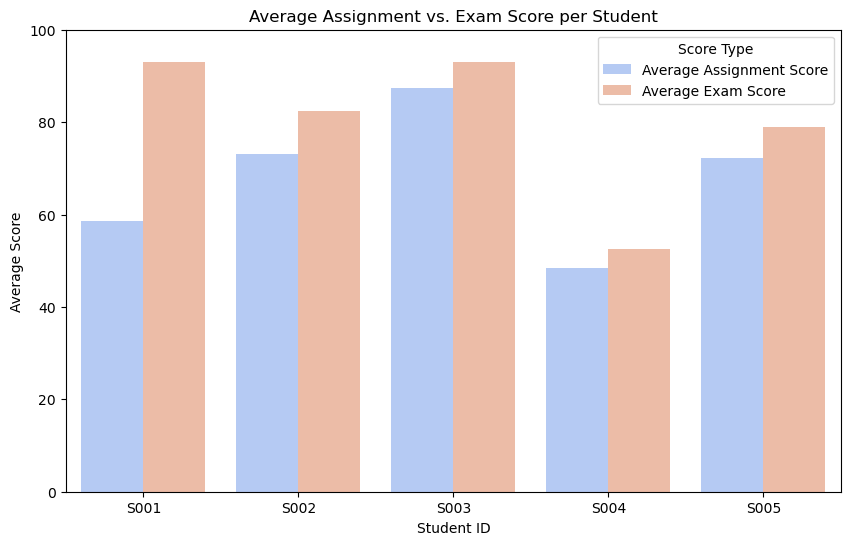

In [16]:
average_assignments = [sum(student.assignments)/len(student.assignments) for student in students]
average_exams = [sum(student.exams)/len(student.exams) for student in students]
student_ids = [student.student_id for student in students]

df_average = pd.DataFrame({
    "Student ID": student_ids,
    "Average Assignment Score": average_assignments,
    "Average Exam Score": average_exams
})
df_average_melted = df_average.melt(id_vars = "Student ID", var_name = "Score Type", value_name = "Average Score")

plt.figure(figsize = (10,6))
sns.barplot(x = "Student ID", y = "Average Score", hue = "Score Type", data = df_average_melted, palette = "coolwarm")
plt.title("Average Assignment vs. Exam Score per Student")
plt.ylabel("Average Score")
plt.xlabel("Student ID")
plt.ylim(0, 100)
plt.legend(title = "Score Type")
plt.show()